### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load train and test Data

In [2]:
train = pd.read_csv(r"D:\Python\Loan prediction\train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv(r"D:\Python\Loan prediction\test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
#mapping the loan_status column in the train dataframe to binary values  

In [6]:
train.Loan_Status = train.Loan_Status.map({'Y': 1, 'N' : 0}) #label encoding

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
Loan_status = train.Loan_Status 

In [10]:
train.drop('Loan_Status',axis = 1, inplace= True)

In [11]:
Loan_ID = test.Loan_ID

In [12]:
df = pd.concat([train,test])

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [14]:
df.shape

(981, 12)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [18]:
# ro fill the missing values in numeric column we use mean of the specific column

In [19]:
df.mean(numeric_only=True)

ApplicantIncome      5179.795107
CoapplicantIncome    1601.916330
LoanAmount            142.511530
Loan_Amount_Term      342.201873
Credit_History          0.835920
dtype: float64

In [20]:
df.mean(numeric_only=True).round(1)

ApplicantIncome      5179.8
CoapplicantIncome    1601.9
LoanAmount            142.5
Loan_Amount_Term      342.2
Credit_History          0.8
dtype: float64

In [21]:
df.fillna(df.mean(numeric_only=True).round(1),inplace = True)

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [23]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [24]:
df['Gender'].mode()[0]

'Male'

In [25]:
# Using the mode (most frequently occurring value) of a specific non-numeric column to fill missing values 

In [26]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

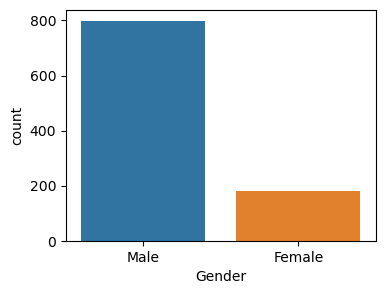

In [28]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Gender', data = df)

<Axes: xlabel='Married', ylabel='count'>

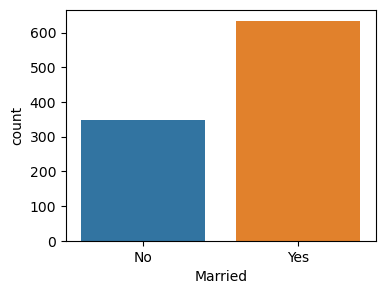

In [29]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Married', data = df)

<Axes: xlabel='Education', ylabel='count'>

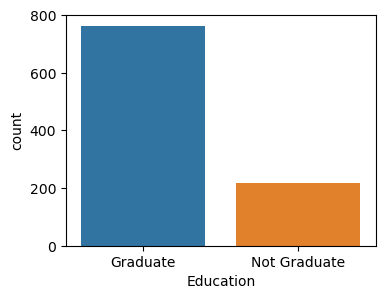

In [30]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Education', data = df)

<Axes: xlabel='Dependents', ylabel='count'>

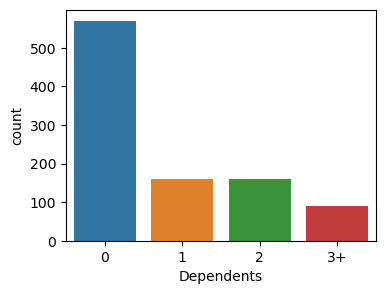

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Dependents', data = df)

<Axes: xlabel='Self_Employed', ylabel='count'>

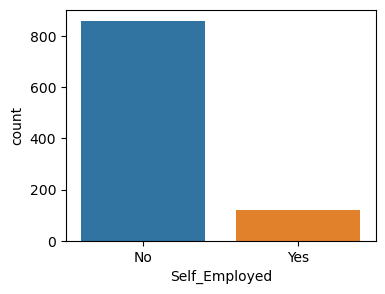

In [32]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Self_Employed', data = df)

<Axes: xlabel='Property_Area', ylabel='count'>

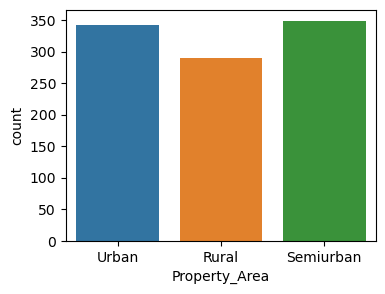

In [33]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'Property_Area', data = df)

In [34]:
df['Dependents'].value_counts()

Dependents
0     570
1     160
2     160
3+     91
Name: count, dtype: int64

In [35]:
df.replace(to_replace='3+', value = 4 , inplace = True)

In [36]:
df['Dependents'].value_counts()

Dependents
0    570
1    160
2    160
4     91
Name: count, dtype: int64

In [37]:
#converting categorical columns to numerical

df.replace({'Married': {'Yes' : 1, 'No' : 0}, 'Gender': {'Male' : 1, 'Female' : 0}, 'Self_Employed': {'Yes' : 1, 'No': 0},
           'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace = True)

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0,1,0,5849,0.0,142.5,360.0,1.0,2
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2


In [39]:
df.drop('Loan_ID', inplace = True, axis = 1)

In [40]:
df.shape 

(981, 11)

In [41]:
Loan_status.shape

(614,)

### Split data into features and target

In [42]:
x = df.iloc[:614] # training set 
y = Loan_status

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [45]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1,1,1,1,0,5649,0.0,44.0,360.0,1.0,2
272,1,0,0,1,0,2833,1857.0,126.0,360.0,1.0,0
474,1,0,2,1,0,5532,4648.0,162.0,360.0,1.0,0
382,0,0,0,1,0,6000,0.0,156.0,360.0,1.0,2
283,0,0,0,1,0,1811,1666.0,54.0,360.0,1.0,2


In [46]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,1,1,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,1,0,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,1,0,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,1,0,4333,2451.0,110.0,360.0,1.0,2
55,1,1,2,1,0,2708,1167.0,97.0,360.0,1.0,1


In [47]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((460, 11), (460,), (154, 11), (154,))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [51]:
models = []

In [52]:
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis", LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector classifier",SVC()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Naive Bayes", GaussianNB()))

The term **"scoring"** refers to the evaluation metric used to assess the performance of a model. Here, scoring is set to **"accuracy"**.

In [56]:
scoring = 'accuracy'

In [ ]:
# "KFold" and "cross_val_score", these modules are used for performing cross-validation, 
# which is a technique for evaluating and selecting models in machine learning.

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [57]:
results = []
names = []

Now, we perform cross-validation for each model in the **"models"** list using the specified scoring metric. Then the evaluation scores for each model is stored
in **"cv_result"** which is then appended into into the "result" list

The name of the model is appended into the **"names"** list. Then in output it prints the mean score for each model with their names respectively.

In [60]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0 , shuffle=True)
    cv_result = cross_val_score(model, x_train, y_train, cv = kfold ,scoring = scoring)
    results.append(cv_result)
    names.append(name)
    print("%s %f" % (name, cv_result.mean()))

C:\Users\Daksha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Daksha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression 0.793478
Decision Tree 0.706522
Linear Discriminant Analysis 0.802174
Random Forest 0.791304
Support Vector classifier 0.671739
KNN 0.641304
Naive Bayes 0.791304


In [61]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
pred = LDA.predict(x_test)
print("Model Accuracy : ", accuracy_score(y_test,pred))

Model Accuracy :  0.8376623376623377


In [70]:
print(confusion_matrix(y_test,pred))

[[ 20  23]
 [  2 109]]


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [71]:
final_test = df.iloc[614:,]
final_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,2
3,1,1,2,1,0,2340,2546.0,100.0,360.0,0.8,2
4,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,2


In [72]:
prediction = LDA.predict(final_test)

In [73]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [83]:
Married = test['Married']
ApplicantIncome = test['ApplicantIncome']
LoanAmount = test['LoanAmount']
Credit_History = test['Credit_History']

In [84]:
prediction_data = pd.DataFrame({"Loan ID" : Loan_ID, 'Married': Married, 'ApplicantIncome': ApplicantIncome,
                                'LoanAmount':LoanAmount, 'Credit_History': Credit_History,"Prediction" : prediction})

In [85]:
prediction_data.head(10)

,Loan ID,Married,ApplicantIncome,LoanAmount,Credit_History,Prediction
0,LP001015,Yes,5720,110.0,1.0,1
1,LP001022,Yes,3076,126.0,1.0,1
2,LP001031,Yes,5000,208.0,1.0,1
3,LP001035,Yes,2340,100.0,NaN,1
4,LP001051,No,3276,78.0,1.0,1
5,LP001054,Yes,2165,152.0,1.0,1
6,LP001055,No,2226,59.0,1.0,1
7,LP001056,Yes,3881,147.0,0.0,0
8,LP001059,Yes,13633,280.0,1.0,1
9,LP001067,No,2400,123.0,1.0,1


In [ ]:
# 1 typically indicates that the loan is approved ('Y').
# 0 typically indicates that the loan is not approved ('N').